In [1]:
import torch

/project/hnguyen/hqvo2/miniconda3/envs/pytorch1.7/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
refpath_train_path = "/home/hqvo2/Projects/MICCAI_2026/PathVG/split/data/pathology2/refpath_train.pth"
refpath_testA_path = "/home/hqvo2/Projects/MICCAI_2026/PathVG/split/data/pathology2/refpath_testA.pth"
refpath_testB_path = "/home/hqvo2/Projects/MICCAI_2026/PathVG/split/data/pathology2/refpath_testB.pth"

In [3]:
refpath_train = torch.load(refpath_train_path)
refpath_testA = torch.load(refpath_testA_path)
refpath_testB = torch.load(refpath_testB_path)

In [4]:
refpath_train

[('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/8006.jpg',
  'UNKNOWN.pth',
  [1680, 603, 138, 153],
  'Upper-right image shows distinct tumor cell cluster spreading.',
  [],
  ['', '', '']),
 ('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/3026.jpg',
  'UNKNOWN.pth',
  [1, 219, 250, 805],
  'Micropapillary tumor cells in alveolar space, upper-left area.',
  [],
  ['', '', '']),
 ('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/19674.jpg',
  'UNKNOWN.pth',
  [309, 1922, 118, 126],
  'Lower-left corner shows darkly stained tumor cells.',
  [],
  ['', '', '']),
 ('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/5447.jpg',
  'UNKNOWN.pth',
  [108, 357, 272, 161],
  'Upper-left corner shows cells with dark, irregular nuclei.',
  [],
  ['', '', '']),
 ('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/4851.jpg',
  'UNKNOWN.pth',
  [770, 1009, 

In [5]:
import random
from typing import List, Tuple, Any, Optional

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


def plot_random_samples_xywh_with_bbox_log(
    samples: List[Tuple[Any, Any, Any, Any, Any, Any]],
    k: int = 8,
    cols: int = 4,
    seed: Optional[int] = None,
    figsize_per_cell: float = 4.0,
    linewidth: float = 2.0,
    color: str = "lime",
    clip: bool = True,
):
    """
    Plots k random samples and prints bbox info for each.

    Expects bbox as [x, y, width, height] in pixel coordinates.
    """
    if seed is not None:
        random.seed(seed)
    if not samples:
        raise ValueError("samples is empty")

    k = min(k, len(samples))
    chosen = random.sample(samples, k)

    rows = (k + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * figsize_per_cell, rows * figsize_per_cell))
    axes = axes.flatten() if hasattr(axes, "flatten") else [axes]

    for ax in axes[k:]:
        ax.axis("off")

    for idx, (ax, item) in enumerate(zip(axes[:k], chosen)):
        img_path, _, bbox_xywh, expression, *_ = item
        x, y, w, h = map(float, bbox_xywh)

        img = Image.open(img_path).convert("RGB")
        W, H = img.size

        # convert to xyxy for logging/clipping
        x1, y1, x2, y2 = x, y, x + w, y + h

        if clip:
            x1c, x2c = max(0.0, x1), min(W - 1.0, x2)
            y1c, y2c = max(0.0, y1), min(H - 1.0, y2)
        else:
            x1c, y1c, x2c, y2c = x1, y1, x2, y2

        wc, hc = (x2c - x1c), (y2c - y1c)

        print(
            f"[{idx}] {img_path}\n"
            f"  expr: {expression}\n"
            f"  img (W,H): ({W},{H})\n"
            f"  bbox input xywh: {bbox_xywh}\n"
            f"  xyxy raw: ({x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f})\n"
            f"  xyxy {'clipped' if clip else 'used'}: ({x1c:.2f}, {y1c:.2f}, {x2c:.2f}, {y2c:.2f})  w={wc:.2f} h={hc:.2f}\n"
        )

        ax.imshow(img)
        ax.axis("off")
        ax.add_patch(
            patches.Rectangle(
                (x1c, y1c),
                max(1.0, wc),
                max(1.0, hc),
                linewidth=linewidth,
                edgecolor=color,
                facecolor="none",
            )
        )
        ax.set_title(str(expression), fontsize=9)

    plt.tight_layout()
    plt.show()

[0] /project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/5586.jpg
  expr: Tumor cells with irregular nuclei in alveolar space.
  img (W,H): (2048,2048)
  bbox input xywh: [1742, 1012, 273, 318]
  xyxy raw: (1742.00, 1012.00, 2015.00, 1330.00)
  xyxy clipped: (1742.00, 1012.00, 2015.00, 1330.00)  w=273.00 h=318.00

[1] /project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/17069.jpg
  expr: Lower-right: tightly packed cells with deeply stained nuclei.
  img (W,H): (2048,2048)
  bbox input xywh: [1500, 1871, 336, 177]
  xyxy raw: (1500.00, 1871.00, 1836.00, 2048.00)
  xyxy clipped: (1500.00, 1871.00, 1836.00, 2047.00)  w=336.00 h=176.00

[2] /project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/2877.jpg
  expr: Micropapillary tumor cells located lower-right in alveolar space.
  img (W,H): (1024,1024)
  bbox input xywh: [741, 487, 283, 537]
  xyxy raw: (741.00, 487.00, 1024.00, 1024.00)
  xyxy clipped: (741.00, 487.00, 1

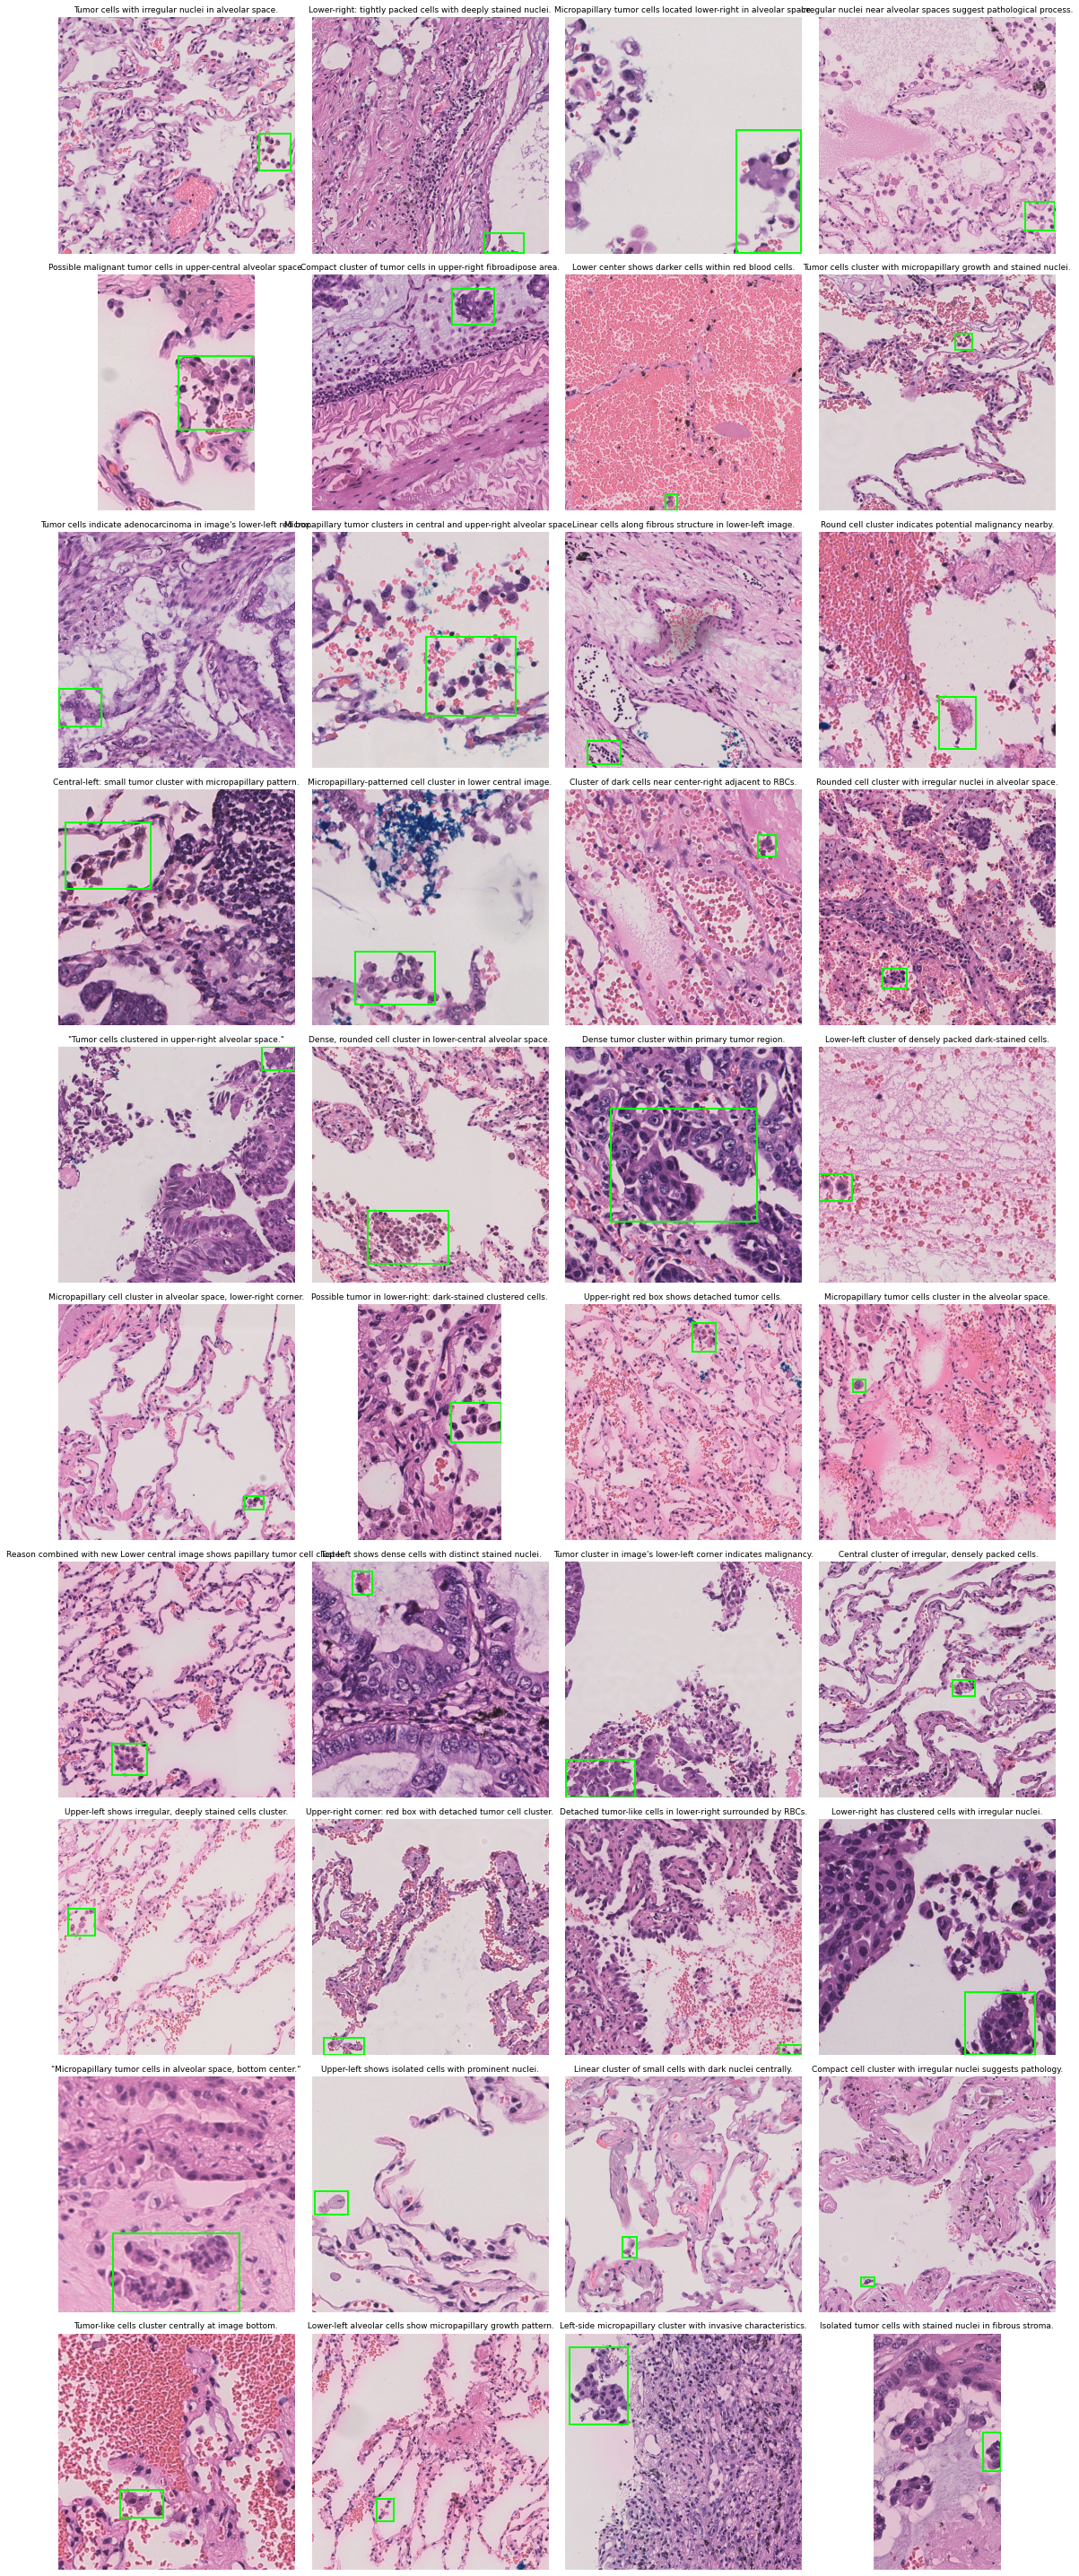

In [7]:
plot_random_samples_xywh_with_bbox_log(refpath_train, k=40)